In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files 
wineread = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [23]:
winewhite = files.upload()

Saving winequality-white.csv to winequality-white (1).csv


In [9]:
import numpy as np
import pandas as pd 
import io 
import requests

In [33]:
red= pd.read_csv('winequality-red.csv', sep=";")
white= pd.read_csv('winequality-white.csv', sep=";")

In [37]:
red['categoria_vinos']='red'
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categoria_vinos
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [38]:
white['categoria_vinos']='white'
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categoria_vinos
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [39]:
#juntamos los dos DataFrame
red_white=red.append(white,ignore_index=True)
red_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categoria_vinos
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [40]:

datos_faltantes=red_white.isnull()
datos_faltantes.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categoria_vinos
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
#Podemos ver que no hay datso faltantes entonces podemos empezar a trabjar con los datos
miss_values_count = red_white.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]
print(miss_values_count)


Series([], dtype: int64)


In [44]:
# tipo de datos
# todos los datos estan en el formato correcto
red_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  categoria_vinos       6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [46]:
#aca podemos ver las estadisticas como la media el valor maximo y minimo en cada categoria etc
red_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [47]:
#podemos ver la correlacion de cada caracteristica de los vinos con respecto a la calidad
red_white.corr()['quality']

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

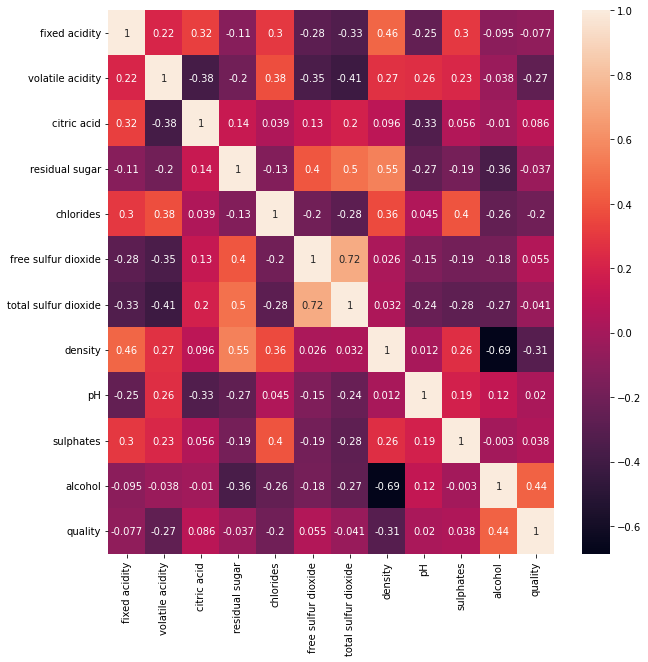

In [52]:
#Grafica de la correlacion de los datos
# Como podemos observas la caracteristicas que mas influye positivamente en cuanto a la calidad del vino es la cantidad de alcohol que contenga, 
#y afectan negativamente la cantidad de cloruro que usen para la eliminacion de olores anormales por la fermantacion y el almacenamiento, tambien su densidad y
# su acidez, cabe aclarar que su efecto tampoco es muy grande pero influye ya que sus valores no sobrepasan el 0.3 y se pueden tomar como una correlacion baja o de termino medio
plt.figure(figsize=(10,10))
sns.heatmap(red_white.corr(),annot=True)
plt.show()

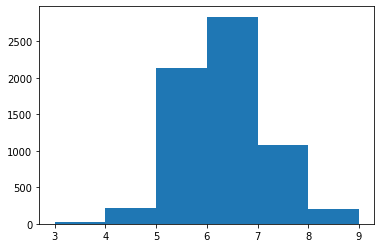

In [58]:
# aca podemos observar que la calidad de la mayoria de los vinos esta en un rango entre 5 y 7 
plt.hist(red_white.quality,bins=6)
plt.show()


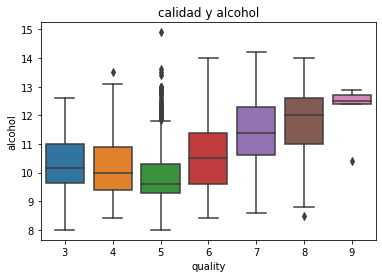

In [63]:
qa = sns.boxplot(x='quality',y='alcohol',data=red_white)
plt.title("calidad y alcohol")
plt.show()

#Podemos observar la relacion de la calidad en el vino respecto al alcohol y podemos ver que en cuanto mas alcohol alla mas influye en la calidad del vino


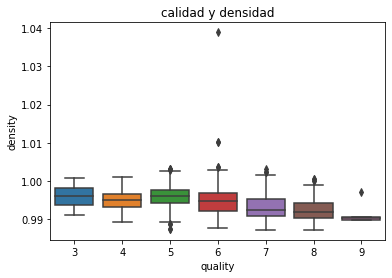

In [71]:
qd= sns.boxplot(x='quality',y='density',data=red_white)
plt.title("calidad y densidad")
plt.show()
# podemos obsevar que los vinos que tienen menos densidad tienden a tener mejor calidad, como podemos ver en los vinos de calidad 9 la densidad que tiene es minima

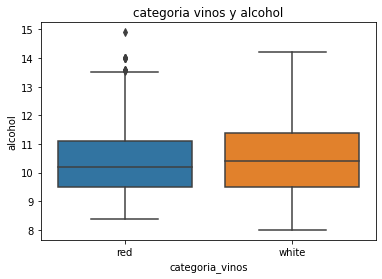

In [75]:
ca= sns.boxplot(x='categoria_vinos',y='alcohol',data=red_white)
plt.title("categoria vinos y alcohol")
plt.show()
# podemos observar que en cuanto el color del vino son muy similares la cantidad de alcohol que contienen siendo el alcohol del vino blanco un poco mas alta.

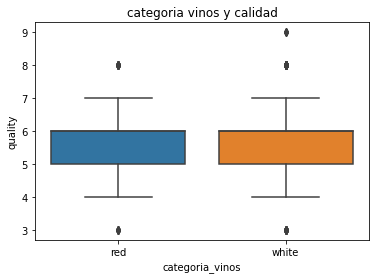

In [74]:
cq= sns.boxplot(x='categoria_vinos',y='quality',data=red_white)
plt.title("categoria vinos y calidad")
plt.show()
# podemos observar que los ambos vinos rojo y blanco tienen la calidad del alcohol muy pareja no se diferencia mucho uno del otro

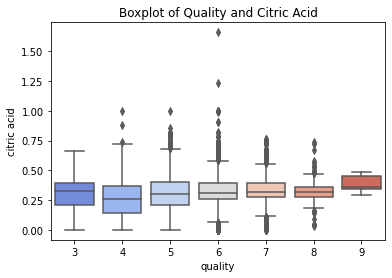

In [80]:
qc=sns.boxplot(x="quality",y="citric acid",data=red_white)
plt.title("Boxplot of Quality and Citric Acid")
plt.show()
#La calidad del vino aumenta con respecto a la cantidad de acido citrico